# Info

Plot the results of 1D forrest function 

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append("../../")

from core import GaussianProcessRegressor, generate_plotdata

In [3]:
plt.rcParams.update({'font.size': 16})

## Plot errors

In [4]:
sgp = np.load('data/sgp.npy', allow_pickle=True)
errors = np.array([i[1] for i in sgp])
errors = np.asarray(errors, float)

In [5]:
opt = np.load('data/opt.npy', allow_pickle=True)
opt_plot = generate_plotdata(opt, 5, fixed_quato=False)

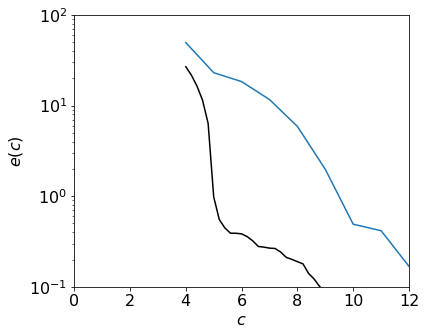

In [7]:
# plot the results 
plt.figure(figsize=(6,5))
plt.plot(4 + np.arange(11), np.median(errors, axis=0))
plt.plot(opt_plot[0], np.median(opt_plot[1], axis=0), color='black')
plt.xlim(0,12)
plt.yscale('log')
plt.ylim(10**-1,10**2)
plt.xlabel('$c$')
plt.ylabel('$e(c)$')
#plt.savefig('figures/results_new.pdf', bbox_inches='tight')
plt.show()

## Plot sequence

In [8]:
def compute_sequence(seed):
    low_number = np.array([np.where(opt[seed][0][i][0:,1]==0)[0].shape[0] - 10 for i in range(len(opt[seed][0]))])
    high_number = np.array([np.where(opt[seed][0][i][0:,1]==1)[0].shape[0] - 2 for i in range(len(opt[seed][0]))])

    
    high_position = np.zeros(len(opt[seed][0]))
    low_position = np.zeros(len(opt[seed][0]))
    for i in range(1,len(opt[seed][0])):
        if high_number[i] > high_number[i-1]:
            high_position[i-1] = 1
        if low_number[i] > low_number[i-1]:
            low_position[i-1] = 1

    high_cost_pisition = (low_number / 5 + high_number)[np.argwhere(high_position==1)]
    low_cost_pisition = (low_number / 5 + high_number)[np.argwhere(low_position==1)]
    return high_cost_pisition + 4, low_cost_pisition + 4

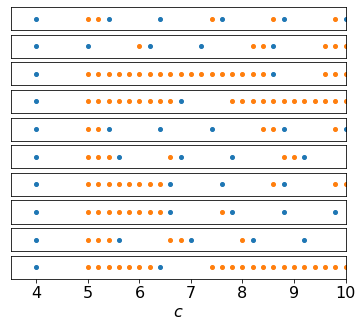

In [9]:
fig, axs = plt.subplots(10,1, figsize=(6,5))
for ii in range(10):
    a, b = compute_sequence(ii)
    axs[ii].scatter(a, np.ones(a.shape[0]), s=16)
    axs[ii].scatter(b, np.ones(b.shape[0]), s=16)
    axs[ii].set_ylim(0,2)
    axs[ii].set_yticks([])
    axs[ii].set_xlim(3.5,10)
    if ii<9: 
        axs[ii].set_xticks([])
    if ii==9:
        axs[ii].set_xticks(np.arange(4,11))
        axs[ii].set_xlabel('$c$')
#plt.savefig('figures/sequence.pdf', bbox_inches='tight')